In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

HOST = '127.0.0.1'
USER = 'root'
PASS = '1234'
DB   = 'classicmodels'


# CODE IS RUNNING PERFECTLY,
# BUT IT MAY BE A LITTLE BIT MORE PROFESSIONAL !

#: Create the connection
cnx = mysql.connector.connect(user=USER, password=PASS, host=HOST, database=DB)
cnx.autocommit = True

#: Create the cursor
mycursor = cnx.cursor()


In [2]:
df1=pd.read_csv('Customers.csv',encoding='cp1254')
df2=pd.read_csv('Orders.csv')
df3=pd.read_csv('OrderDetails.csv')
df4=pd.read_csv('Payments.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Customers.csv'

In [116]:
# Merge the DataFrames 
merged_c_o = pd.merge(df2[['customerNumber','shippedDate']], df1[['customerNumber', 'customerName','country']], left_on='customerNumber', right_on='customerNumber', how='inner')

# Select only the desired columns
result_c_o= merged_c_o[[ 'customerNumber','customerName','country','shippedDate']]
print(result_c_o)


     customerNumber                        customerName  country shippedDate
0               363        Online Diecast Creations Co.      USA  2003-01-10
1               363        Online Diecast Creations Co.      USA  2003-11-25
2               363        Online Diecast Creations Co.      USA  2004-11-10
3               128                Blauer See Auto, Co.  Germany  2003-01-11
4               128                Blauer See Auto, Co.  Germany  2004-03-20
..              ...                                 ...      ...         ...
321             299           Norway Gifts By Mail, Co.   Norway  2004-08-26
322             299           Norway Gifts By Mail, Co.   Norway  2003-10-08
323             286                Marta's Replicas Co.      USA  2004-08-31
324             286                Marta's Replicas Co.      USA  2004-10-15
325             415  Bavarian Collectables Imports, Co.  Germany  2004-09-16

[326 rows x 4 columns]


In [115]:
#how many customers do you have per country? 

grouped_country= result_c_o.groupby('country')['customerNumber'].count().sort_values(ascending=False)
print(grouped_country)

country
USA            112
France          37
Spain           36
Australia       19
New Zealand     15
UK              13
Italy           10
Finland          9
Norway           9
Singapore        9
Germany          7
Austria          7
Belgium          7
Sweden           7
Canada           7
Denmark          7
Japan            6
Philippines      3
Hong Kong        2
Ireland          2
Switzerland      2
Name: customerNumber, dtype: int64


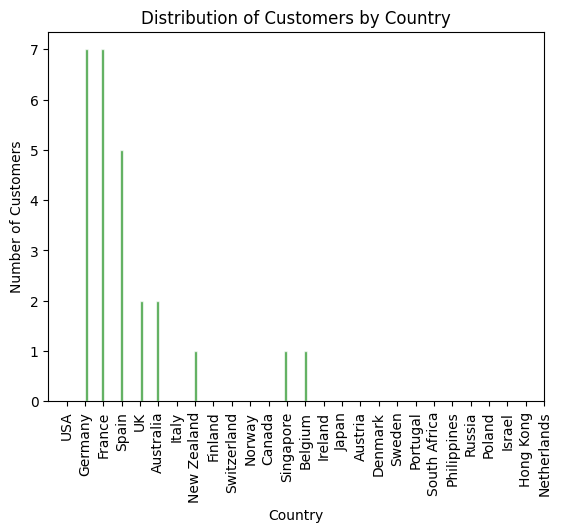

In [80]:
plt.hist(grouped_df.values, 
         bins=200, 
         color='green',  # Change the color to steel blue
         edgecolor='white',  # Add white edges around the bars
         linewidth=1,     # Increase the width of the edges
         alpha=0.7)          # Add some transparency to the bars

# Set the x-axis tick labels and title
plt.xticks(range(len(grouped_df.index)), grouped_df.index, rotation=90)
plt.xlim(-1, len(grouped_df.index) - 1)  # set the x-axis range
plt.xlabel('Country')
plt.title('Distribution of Customers by Country')

# Set the y-axis label
plt.ylabel('Number of Customers')

# Show the plot
plt.show()

In [98]:
# Merge the DataFrames 
merged_df = pd.merge(df4[['paymentDate', 'customerNumber','amount']], df1[['customerNumber', 'customerName']], left_on='customerNumber', right_on='customerNumber', how='inner')

# Select only the desired columns
result_df = merged_df[[ 'customerNumber','customerName','amount','paymentDate']]
print(result_df)


     customerNumber          customerName    amount paymentDate
0               103     Atelier graphique   5307.98  2004-10-19
1               103     Atelier graphique  16560.30  2003-06-05
2               103     Atelier graphique   2311.68  2004-12-18
3               112    Signal Gift Stores  14449.61  2004-12-17
4               112    Signal Gift Stores  33847.62  2003-06-06
..              ...                   ...       ...         ...
267             495  Diecast Collectables   7129.00  2004-05-14
268             496     Kelly's Gift Shop  34332.29  2005-06-25
269             496     Kelly's Gift Shop  37754.33  2003-07-16
270             496     Kelly's Gift Shop  58593.28  2004-12-31
271             496     Kelly's Gift Shop  26421.24  2003-11-29

[272 rows x 4 columns]


In [103]:
#Who made the most payments?
grouped_customer = result_df.groupby(['customerNumber','customerName'])['amount'].sum().sort_values(ascending=False)
print(grouped_customer)

customerNumber  customerName                
141             Euro+ Shopping Channel          793051.13
124             Mini Gifts Distributors Ltd.    647596.29
151             Muscle Machine Inc              197736.94
114             Australian Collectors, Co.      195364.73
148             Dragon Souveniers, Ltd.         172989.68
                                                  ...    
456             Microscale Inc.                  33144.93
473             Frau da Collezione               28951.91
198             Auto-Moto Classics Inc.          26479.26
103             Atelier graphique                24179.96
219             Boards & Toys Co.                 9129.35
Name: amount, Length: 98, dtype: float64
